In [1]:
from création_data import param_Dataset
import fonctions_ss as f
from IPython.display import display, Audio
from scipy.io.wavfile import write
import pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
plt.rcParams["figure.figsize"] = (12,4)

In [2]:
Fe = 2**14

In [3]:
Fichier = "../../Dataset/Test vico/metal"
N_sample, param_dataset, xinB = param_Dataset(N_sample=200,
                                            #  article_C = True,
                                             acier_1C = True,
                                             acier_2C = False, 
                                             medium_1T = True, 
                                             medium_2T = False,
                                             metal_T = False,
                                             plexi_T = False)

0.0030881698705154995


[0.07445974 0.07445864 0.07446228 0.07445682 0.07446119 0.07445937
 0.07446658 0.07446549 0.07446367]
0.0010036552079175374


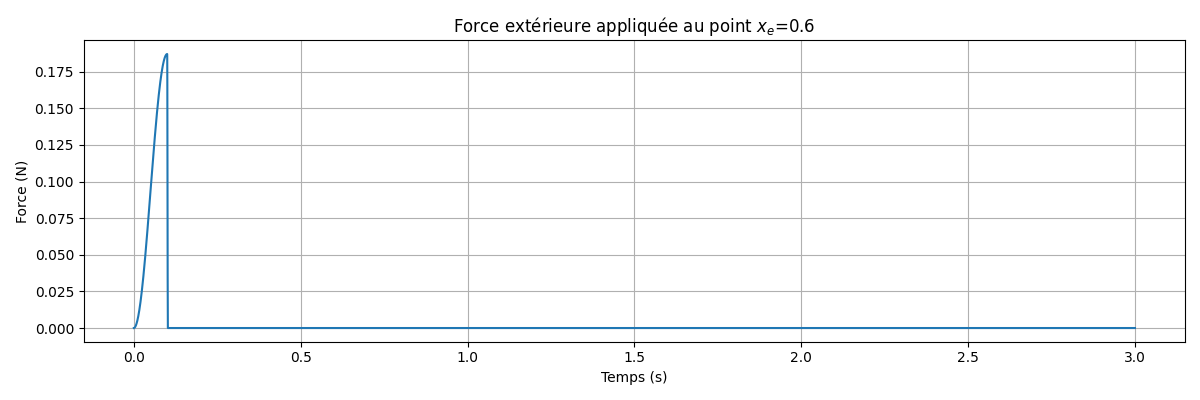

In [4]:
N_sample=1
for i in range(N_sample):
    T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly = param_dataset[i]
    simu = f.Main_ss(T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly,xinB,Fe, obs="acc")
    # write(Fichier + str(i) + '.wav',rate=Fe ,data = Force_au_chevalet_Nt / max(abs(Force_au_chevalet_Nt)))

In [5]:
print("Simulation :")
display(Audio(simu, rate=Fe))
# print("Expérience :")
# display(Audio(acc, rate=fs2))

Simulation :


In [6]:
from scipy.io import wavfile, loadmat
C1P1mat = loadmat("../../Mesures/Mesures_2023.01.27_LAM_normalise/Medium_1/Corde_Acier/C_3_P_1.mat")
acc = C1P1mat["acc_t"].reshape(-1)
fs2 = int(C1P1mat["fs"].reshape(-1))

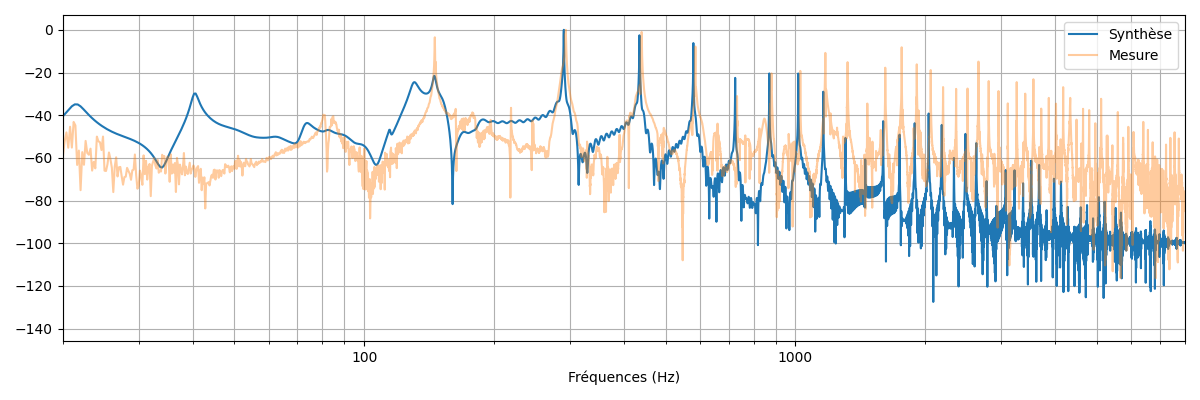

In [7]:
fs = Fe
Nfft = len(simu)
Y = np.fft.rfft(simu, Nfft)
fy = np.fft.rfftfreq(Nfft,1/fs)
Y = np.abs(Y)/np.max(np.abs(Y))

Nfft = len(acc)
Y2 = np.fft.rfft(acc, Nfft)
Y2 = np.abs(Y2)/np.max(np.abs(Y2))
fy2 = np.fft.rfftfreq(Nfft,1/fs2)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.semilogx(fy,20*np.log10(np.abs(Y)),label="Synthèse")
ax1.semilogx(fy2,20*np.log10(np.abs(Y2)),label="Mesure", alpha=0.4)
ax1.grid(which="both")
ax1.legend()
ax1.set_xlabel("Fréquences (Hz)")
ax1.set_ylabel("")
ax1.set_title(r"")
ax1.set_xlim(20,8000)
ax1.set_ylim()
import matplotlib.ticker as mticker
# ax1.xaxis.set_minor_formatter(mticker.ScalarFormatter())
ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())
fig.tight_layout()

plt.show()

In [8]:
import pickle
with open("../Guitar_model/experiences/modal_m2.pkl", "rb") as f :
    modal_analysis_m2 = pickle.load(f)

import pandas as pd
pd.DataFrame(modal_analysis_m2).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
table,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2
freq,107.109484,163.230958,190.083095,265.824204,413.324927,429.22436,460.312744,533.201989,604.013371,695.290919,759.978194,816.237921,872.904512,909.5429,1043.627614,1094.671593
xi,-0.000471,-0.001456,-0.000493,-0.000567,-0.002309,-0.00096,-0.000979,-0.000899,-0.0014,-0.000975,-0.001144,-0.002126,-0.002223,-0.001305,-0.0017,-0.00364
ratios,1.0,1.523964,1.774662,2.481799,3.858901,4.007342,4.297591,4.978102,5.639215,6.491404,7.09534,7.620594,8.149647,8.491712,9.743559,10.220118
xi_mod,-0.112532,-0.228424,-0.066335,-0.054624,-0.143033,-0.05725,-0.05447,-0.04318,-0.059321,-0.035913,-0.038542,-0.066675,-0.065191,-0.03673,-0.041708,-0.085118


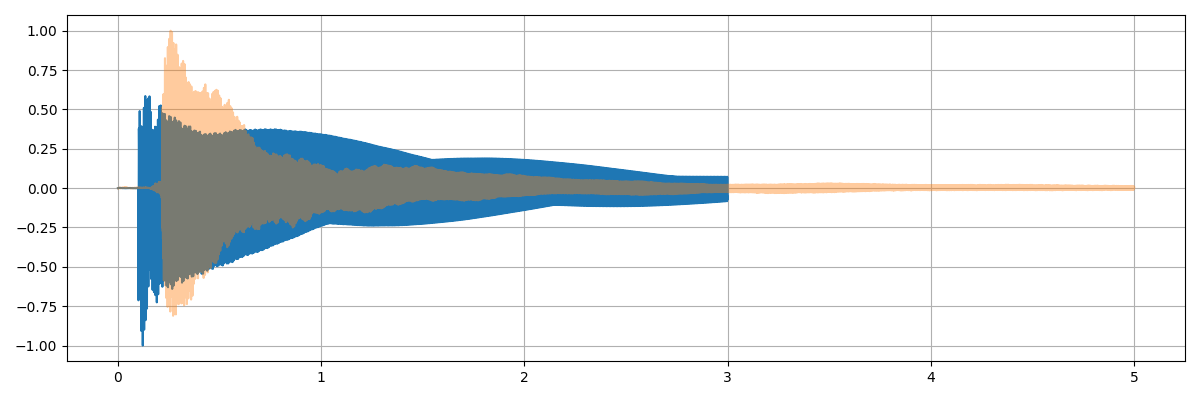

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

t = np.arange(len(simu))/Fe
simu /= np.max(np.abs(simu))
t2 = np.arange(len(acc))/fs2
acc /= np.max(np.abs(acc))

ax1.plot(t,simu,label="")
ax1.plot(t2,acc,label="", alpha=0.4)
ax1.grid()
#ax1.legend()
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title(r"")
ax1.set_xlim()
ax1.set_ylim()

fig.tight_layout()

plt.show()